# Libraries

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

from tqdm import tqdm

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler,
                                   RobustScaler,
                                   Normalizer,
                                   PolynomialFeatures,
                                   LabelEncoder,
                                   OneHotEncoder,
                                   OrdinalEncoder)

from sklearn.model_selection import (cross_val_score,
                                     KFold,
                                     StratifiedShuffleSplit,
                                     GridSearchCV,
                                     StratifiedKFold,
                                     cross_validate,
                                     train_test_split)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import (precision_score,
                             accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             PrecisionRecallDisplay)

import warnings
warnings.filterwarnings("ignore")

In [139]:
RS = 42

# Loading data

In [44]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)
sumbit = pd.read_csv('sample_submission.csv', index_col = 0)

In [45]:
sumbit

,Machine failure
id,
136429,0.5
136430,0.5
136431,0.5
136432,0.5
136433,0.5
...,...
227378,0.5
227379,0.5
227380,0.5


In [46]:
train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [47]:
test.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 14.6+ MB


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90954 entries, 136429 to 227382
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               90954 non-null  object 
 1   Type                     90954 non-null  object 
 2   Air temperature [K]      90954 non-null  float64
 3   Process temperature [K]  90954 non-null  float64
 4   Rotational speed [rpm]   90954 non-null  int64  
 5   Torque [Nm]              90954 non-null  float64
 6   Tool wear [min]          90954 non-null  int64  
 7   TWF                      90954 non-null  int64  
 8   HDF                      90954 non-null  int64  
 9   PWF                      90954 non-null  int64  
 10  OSF                      90954 non-null  int64  
 11  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 9.0+ MB


In [50]:
train.drop_duplicates(inplace = True)

# EDA (small)

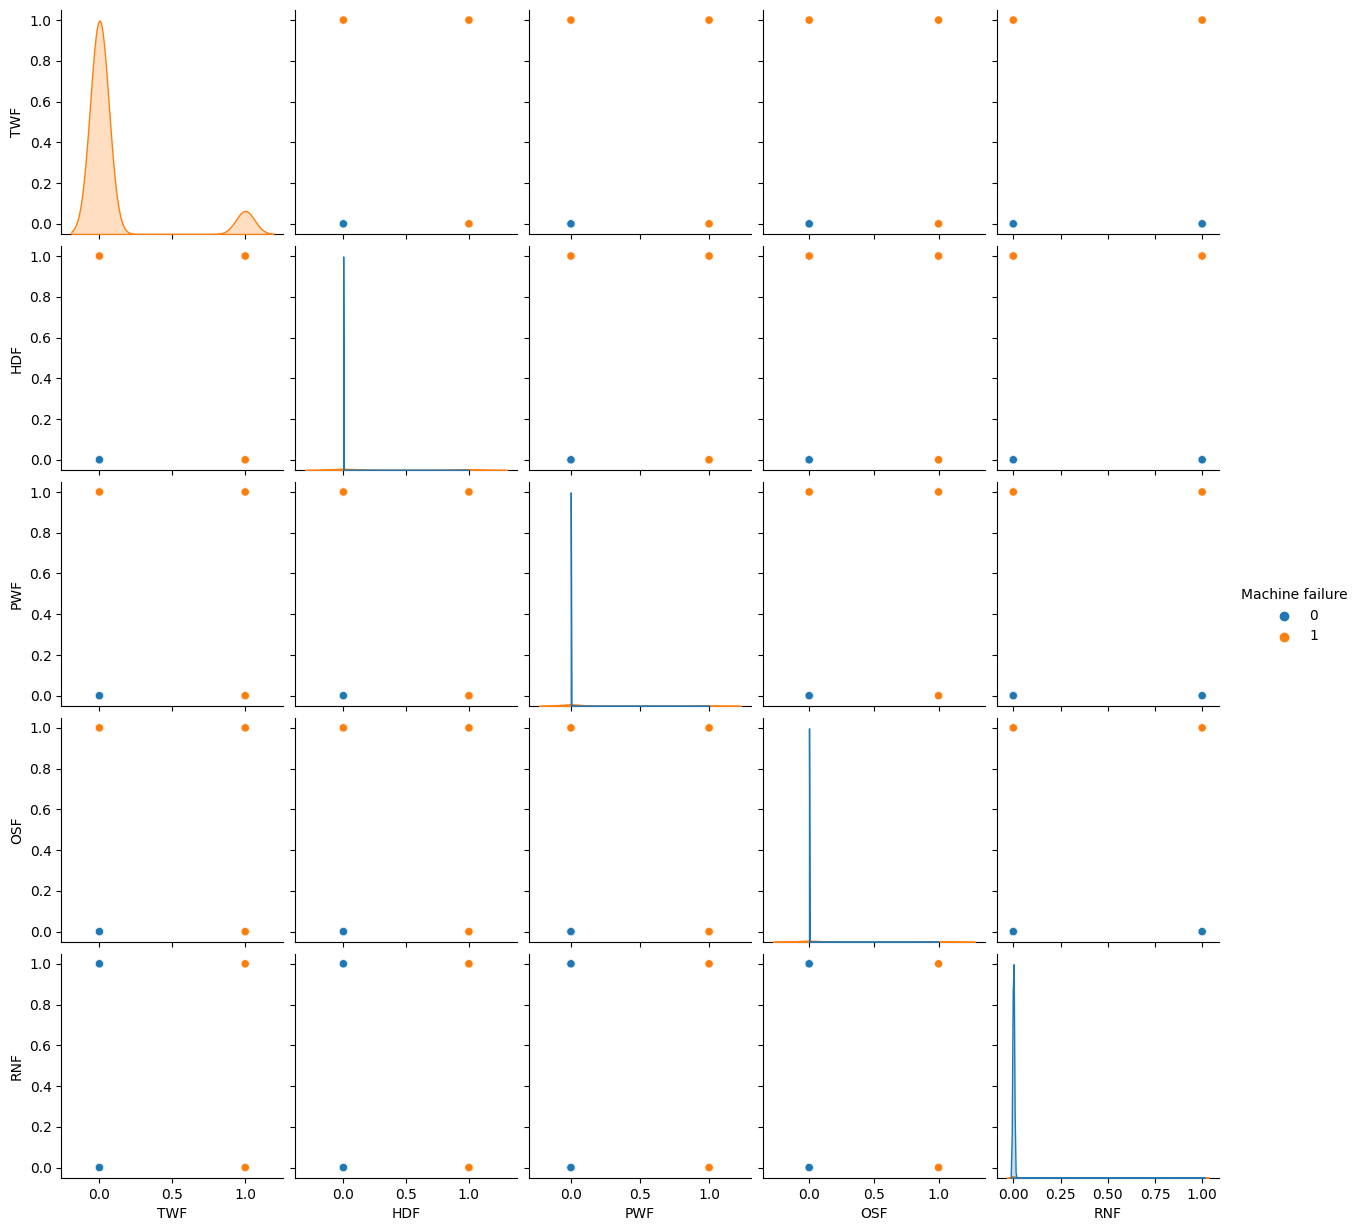

In [109]:
sns.pairplot(train.iloc[:,-6:], hue = 'Machine failure')

In [51]:
train.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,135295.000000,135295.000000,135295.000000,135295.000000,135295.000000,135295.000000,135295.000000,135295.000000,135295.000000,135295.000000,135295.000000
mean,299.863074,309.941071,1520.339318,40.341770,104.365224,0.015736,0.001537,0.005181,0.002365,0.003940,0.002262
std,1.862655,1.384941,138.643328,8.492636,63.945614,0.124453,0.039179,0.071795,0.048576,0.062642,0.047504
min,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
test.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


Disbalanced classes

In [53]:
train['Machine failure'].value_counts()

0    133166
1      2129
Name: Machine failure, dtype: int64

In [128]:
x = train.drop('Machine failure', axis = 1)
y = train['Machine failure']

cat_cols = ['Type']
num_cols = x.dtypes[x.dtypes != 'object'].index.to_list()

# Machine learning

Own function for pipeline

In [87]:
class CustomTransformer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def fit(self, df_source, y=None):
        return self

    def transform(self, df_source, y=None):
        df = df_source.copy()
        df['number'] = df['Product ID'].apply(lambda x: int(x[1:]))
        df.drop('Product ID', axis = 1, inplace = True)
        return df

In [131]:

'''
CT = ColumnTransformer([
        ("scaler", OneHotEncoder(), cat_cols),
        ("poly", PolynomialFeatures(degree=3), num_cols)
    ],  remainder = 'passthrough')





pipe = Pipeline([('feature_id', CustomTransformer()),
                  ('preprocessing', CT),
                 ('scaler', StandardScaler()),
                ])


x_train_ct = pipe.fit_transform(x)
x_test_ct = pipe.transform(test)
'''

## Random Forest

In [136]:
CT = ColumnTransformer([
        ("scaler", OrdinalEncoder(), cat_cols),

    ],  remainder = 'passthrough')



pipe = Pipeline([('feature_id', CustomTransformer()),
                  ('preprocessing', CT),
                 ('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier(max_depth = 3, random_state=RS))
                ])




param_grid = [
    {
    }
]

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1, scoring = 'roc_auc')

grid.fit(x, y)
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T


,0
mean_fit_time,27.132239
std_fit_time,5.609341
mean_score_time,0.762334
std_score_time,0.221332
params,{}
split0_test_score,0.901174
split1_test_score,0.88955
split2_test_score,0.896068
split3_test_score,0.932026
split4_test_score,0.894264


### SMOTE

In [ ]:
CT = ColumnTransformer([
        ("scaler", OrdinalEncoder(), cat_cols),
    ],  remainder = 'passthrough')



pipe = Pipeline([('feature_id', CustomTransformer()),
                  ('preprocessing', CT),
                 ('scaler', StandardScaler()),
                 ('SMOTE', SMOTE(random_state=RS)),
                 ('classifier', RandomForestClassifier(max_depth = 3, random_state=RS))
                ])




param_grid = [
    {
    }
]

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1, scoring = 'roc_auc')

grid.fit(x, y)
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T


## Logistic Regression

In [140]:
CT = ColumnTransformer([
        ("scaler", OneHotEncoder(), cat_cols),
        ("poly", PolynomialFeatures(degree=3), num_cols)
    ],  remainder = 'passthrough')



pipe = Pipeline([('feature_id', CustomTransformer()),
                  ('preprocessing', CT),
                 ('scaler', StandardScaler()),
                 ('classifier', LogisticRegression(solver = 'liblinear', random_state=RS))
                ])




param_grid = [
    {
    }
]

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1, scoring = 'roc_auc')

grid.fit(x, y)
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0
mean_fit_time,13.319813
std_fit_time,2.500842
mean_score_time,0.264678
std_score_time,0.050167
params,{}
split0_test_score,0.95411
split1_test_score,0.951559
split2_test_score,0.965899
split3_test_score,0.937524
split4_test_score,0.961099


In [141]:
CT = ColumnTransformer([
        ("scaler", OneHotEncoder(), cat_cols),
        #("poly", PolynomialFeatures(degree=3), num_cols)
    ],  remainder = 'passthrough')



pipe = Pipeline([('feature_id', CustomTransformer()),
                  ('preprocessing', CT),
                 ('scaler', StandardScaler()),
                 ('classifier', LogisticRegression(solver = 'liblinear', random_state=RS))
                ])




param_grid = [
    {
    }
]

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1, scoring = 'roc_auc')

grid.fit(x, y)
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T


,0
mean_fit_time,0.838303
std_fit_time,0.346926
mean_score_time,0.071696
std_score_time,0.011816
params,{}
split0_test_score,0.934771
split1_test_score,0.929727
split2_test_score,0.952564
split3_test_score,0.920808
split4_test_score,0.933386


In [149]:
CT = ColumnTransformer([
        ("scaler", OneHotEncoder(), cat_cols),
        ("poly", PolynomialFeatures(degree=4), num_cols)
    ],  remainder = 'passthrough')



pipe = Pipeline([('feature_id', CustomTransformer()),
                  ('preprocessing', CT),
                 ('scaler', StandardScaler()),
                 ('SMOTE', SMOTE(sampling_strategy = 0.3,random_state=RS)),
                 ('classifier', LogisticRegression(solver = 'liblinear', random_state=RS))
                ])




param_grid = [
    {
        # 'classifier__C' : [0.1, 1, 10, 100, 1000]
    }
]

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1, scoring = 'roc_auc')

grid.fit(x, y)
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0
mean_fit_time,49.996782
std_fit_time,10.452807
mean_score_time,0.883539
std_score_time,0.259937
params,{}
split0_test_score,0.955076
split1_test_score,0.951623
split2_test_score,0.965695
split3_test_score,0.935098
split4_test_score,0.959991


# Final Submission

In [153]:
pipe.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('feature_id', CustomTransformer()),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', OneHotEncoder(),
                                                  ['Type']),
                                                 ('poly',
                                                  PolynomialFeatures(degree=4),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]', 'TWF',
                                                   'HDF', 'PWF', 'OSF',
                                                   'RNF'])])),
                ('scaler', StandardScaler()),
                ('SMOTE', SMOTE(random_state=42, sampling_strategy=0.3)),
                ('classifier', LogisticRegression(random_state=42))])

In [154]:
pred = pipe.predict(test)

In [155]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
sumbit['Machine failure'] = pred

In [158]:
sumbit.to_csv('first_submission.csv')